In [ ]:
SkillCraft Technology Internship
Task 01 — House Price Prediction

Intern Name: Soujanya M   

Objective
Implement a **Linear Regression Model** to predict house prices based on:
- Square footage (`GrLivArea`)
- Number of bedrooms (`BedroomAbvGr`)
- Number of bathrooms (`FullBath`)

Dataset: House Price Dataset    

Results
- Mean Absolute Error (MAE): 35788.06  
- Root Mean Squared Error (RMSE): 52975.72  
- R² Score: 0.6341  

Insights
The model performs reasonably well with an R² score of 0.63, meaning it explains about 63% of the variance in house prices.  
To improve accuracy, we could try:
- Adding more predictive features (e.g., garage size, lot area)
- Using advanced models (Random Forest, XGBoost)
- Applying feature scaling or regularization.




In [ ]:
Step 1: Import Required Libraries  

In this step, we import essential Python libraries for data handling, visualization, and model building.


In [ ]:
import pandas as pd

# Load training data
df = pd.read_csv("train.csv")
print(df.shape)
df.head()


In [ ]:
Step 3: Data Preprocessing and Feature Selection  

In this step, we select the key features and define the target variable as per the task requirements:

Features:
  - `GrLivArea` — Above ground living area (square feet)  
  - `BedroomAbvGr` — Number of bedrooms above ground  
  - `FullBath` — Number of full bathrooms  

Target Variable:
  - `SalePrice` — The house sale price  

We also check for any missing values in these selected columns before training the model.


In [2]:
# Select features and target as per task
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = df[features]
y = df[target]

# Check for missing values
print("Missing values in features:\n", X.isnull().sum())
print("\nMissing values in target:", y.isnull().sum())


Missing values in features:
 GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64

Missing values in target: 0


In [ ]:
Step 4: Split the Data into Training and Testing Sets  

To evaluate our model properly, we split the dataset into:
- Training set (80%)— used to train the model  
- Testing set (20%)— used to test how well the model generalizes  

We use `train_test_split` from `sklearn.model_selection` to perform this split, with a fixed `random_state=42` for reproducibility.


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1168
Testing samples: 292


In [ ]:
Step 5: Train the Linear Regression Model  

Now we create and train a Linear Regression model using the training data.  

The model will learn the relationship between:
- `GrLivArea`, `BedroomAbvGr`, `FullBath` (features)  
and  
- `SalePrice` (target variable).  

After training, we print the intercept and coefficients to understand how each feature impacts the sale price.

In [4]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 52261.74862694451
Coefficients: [   104.02630701 -26655.16535734  30014.32410896]


In [ ]:
Step 6: Model Evaluation  

After training the model, we evaluate its performance on the test dataset using the following metrics:

- Mean Absolute Error (MAE):
  Average of absolute differences between actual and predicted prices.  
- Root Mean Squared Error (RMSE): 
  Penalizes larger errors more than MAE — useful for comparing model accuracy.  
- R² Score:
  Represents how well the model explains the variance in the target variable (closer to 1 = better).

These metrics help us understand how accurately the model predicts house prices.



In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 35788.06
Root Mean Squared Error (RMSE): 52975.72
R² Score: 0.6341


In [ ]:
Step 7: Visualization — Actual vs Predicted Prices  

To visually assess the model’s performance, we plot a scatter graph comparing:  
- Actual Sale Prices(true values)  
- Predicted Sale Prices(model outputs)

A red dashed line (`y = x`) represents perfect predictions —  the closer the points are to this line, the better the model’s performance.


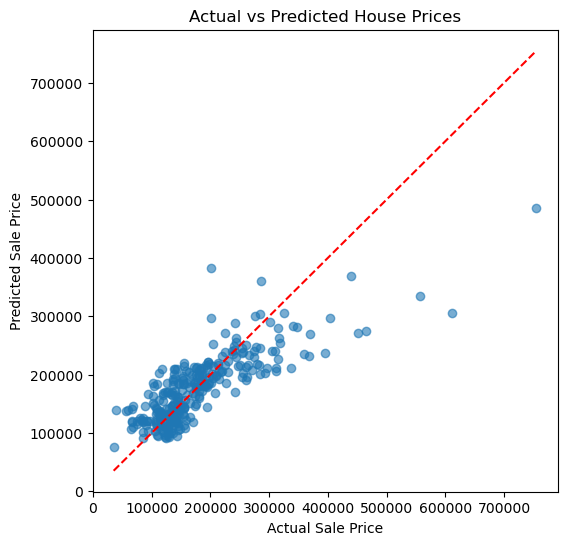

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [ ]:
Step 8: Predict on Test Data and Generate Submission File  

In this step, we apply the trained Linear Regression model to the unseen test dataset.

Steps performed:
1. Load the `test.csv` file.  
2. Select the same features used for training (`GrLivArea`, `BedroomAbvGr`, `FullBath`).  
3. Predict the SalePrice for each test sample.  
4. Create a DataFrame containing:
   - `Id`  
   - `Predicted SalePrice`  
5. Save the results as submission.csv, which can be uploaded for evaluation.

Finally, we preview the first few predictions.


In [7]:
# Load test data
test_df = pd.read_csv("test.csv")

# Select the same features used for training
X_test_data = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Predict sale prices using the trained model
test_predictions = model.predict(X_test_data)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# Save predictions to CSV
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv file created successfully!")
submission.head()


✅ submission.csv file created successfully!


,Id,SalePrice
0,1461,122173.313104
1,1462,140561.538683
2,1463,201783.754896
3,1464,199183.097221
4,1465,192133.739106
